This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

From Training the same model on MNIST data with noise channels or all-zero channels
Add validation accuracy of original data for mnist data

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 6s 13ms/step - loss: 0.2982 - accuracy: 0.9138 - val_loss: 0.1509 - val_accuracy: 0.9564
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1234 - accuracy: 0.9634 - val_loss: 0.1040 - val_accuracy: 0.9709
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0803 - accuracy: 0.9762 - val_loss: 0.0903 - val_accuracy: 0.9718
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0585 - accuracy: 0.9832 - val_loss: 0.0780 - val_accuracy: 0.9770
Epoch 5/10
375/375 [==============================] - 5s 15ms/step - loss: 0.0433 - accuracy: 0.9871 - val_loss: 0.0761 - val_accuracy: 0.9763
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0325 - accuracy: 0.9909 - val_loss: 0.0757 - val_accuracy: 0.9772
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0241 - accuracy: 0.9933 - val_loss: 0.0776 - val_accuracy: 0.9778

In [6]:
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]


Epoch 1/10


InvalidArgumentError: ignored

**Plotting a validation accuracy comparison**

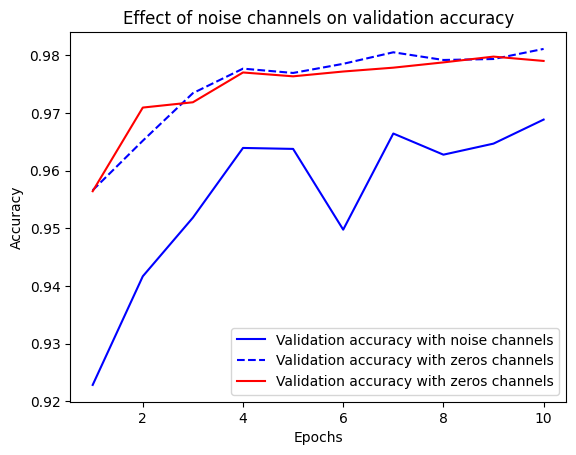

In [11]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original =history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r-",
         label="Validation accuracy with original channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [16]:
epochs

range(1, 11)

In [17]:
train_acc_original

[0.10233332961797714,
 0.11760416626930237,
 0.12691666185855865,
 0.13899999856948853,
 0.1511249989271164]

In [18]:
epochs = range(1, 6)

Epoch 1/5
375/375 [==============================] - 6s 15ms/step - loss: 2.3146 - accuracy: 0.1058 - val_loss: 2.3055 - val_accuracy: 0.0971
Epoch 2/5
375/375 [==============================] - 4s 12ms/step - loss: 2.2992 - accuracy: 0.1159 - val_loss: 2.3102 - val_accuracy: 0.1022
Epoch 3/5
375/375 [==============================] - 5s 12ms/step - loss: 2.2920 - accuracy: 0.1244 - val_loss: 2.3167 - val_accuracy: 0.1011
Epoch 4/5
375/375 [==============================] - 6s 15ms/step - loss: 2.2811 - accuracy: 0.1370 - val_loss: 2.3205 - val_accuracy: 0.1029
Epoch 5/5
375/375 [==============================] - 5s 12ms/step - loss: 2.2651 - accuracy: 0.1508 - val_loss: 2.3370 - val_accuracy: 0.1013


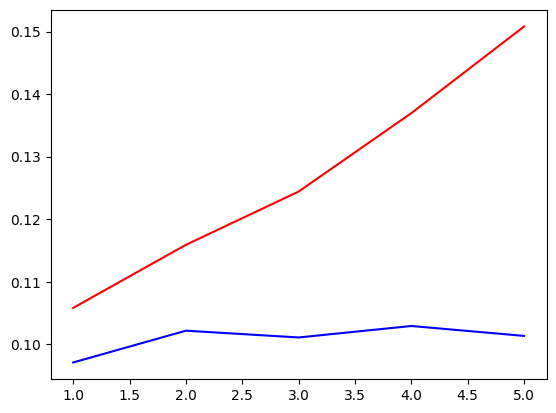

In [20]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model_history=model.fit(train_images, random_train_labels,
          epochs=5,
          batch_size=128,
          validation_split=0.2)
train_acc_original =model_history.history["accuracy"]
val_acc_original =model_history.history["val_accuracy"]

plt.plot(epochs, train_acc_original, "r-",
         label="Training accuracy ")
plt.plot(epochs, val_acc_original, "b-",
         label="Validation accuracy ")

In [ ]:
plt.plot(epochs, train_acc_original, "b-",
         label="Training accuracy ")
plt.plot(epochs)

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [1]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_model = model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)
val_acc = history_model.history["val_accuracy"]
plt.plot(epochs, val_accl, "b-",
         label="Validation accuracy ")

NameError: ignored

**The same model with a more appropriate learning rate**

In [22]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 0.3356 - accuracy: 0.9114 - val_loss: 0.1560 - val_accuracy: 0.9565
Epoch 2/10
375/375 [==============================] - 6s 15ms/step - loss: 0.1233 - accuracy: 0.9658 - val_loss: 0.1451 - val_accuracy: 0.9656
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1008 - accuracy: 0.9732 - val_loss: 0.1490 - val_accuracy: 0.9685
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0833 - accuracy: 0.9779 - val_loss: 0.1672 - val_accuracy: 0.9682
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0698 - accuracy: 0.9824 - val_loss: 0.1645 - val_accuracy: 0.9711
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0608 - accuracy: 0.9854 - val_loss: 0.1931 - val_accuracy: 0.9715
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0603 - accuracy: 0.9867 - val_loss: 0.2395 - val_accuracy: 0.9666

In [ ]:
#larger model
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

In [ ]:
#smaller model
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary